<a href="https://colab.research.google.com/github/shrutikamokashi/Amazon-Reviews-for-Sentiment-Analysis/blob/master/Finalproject_initialreport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Description- We are implementing Sentiment analysis using twitter data. We will fetch data from twitter and implement text segmentation using NLP. The text will be the tweets which will be divided into positive text, negative text, neutral text also, some special characters like, hashtags etc. Through this, we will analyse and differentiate between any two factors and compare both of them.

Team: EAI 6000 (Capstone Project)

*   Shrutika Mokashi
*   Yashmi Sevak
*   Janaki Sajja





For using this package, first we need to install it using pip.

In [1]:
pip install python-twitter

     |████████████████████████████████| 71kB 2.8MB/s 


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from nltk.stem.porter import * 
from wordcloud import WordCloud

In [0]:
# -*- coding: utf-8 -*-
"""Contains tools for preprocess text data.
@author scorrea
"""
import re
import numpy as np
from nltk.stem import SnowballStemmer


SUPPPORTED_LANG_STEMMER = {
    'SPA': SnowballStemmer('spanish'),
    'ENG': SnowballStemmer('english'),
    'PRT': SnowballStemmer('portuguese'),
}


def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

def rm_pun_num_esp_cha(pandas_input):
   return pandas_input.str.replace("[^a-zA-Z#]", " ")

def rm_esp_cha(pandas_input):
   return pandas_input.str.replace("[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕñçÇ: ]", " ")

def rm_length_word(input_data, word_length=3):
    return input_data.apply(lambda x: ' '.join([w for w in x.split() if len(w) > word_length]))

def tokenize(input_data):
    return input_data.apply(lambda x: x.split())

def _check_lang(lang):
  if lang in SUPPPORTED_LANG_STEMMER:
        return True
  else:
      return False

def stemmer(input_data, language='ENG'):
    if  _check_lang(language):
        stemmer = SUPPPORTED_LANG_STEMMER[language]
        return input_data.apply(lambda x: [stemmer.stem(i) for i in x])
    else:
        raise "Language {} not sopported for stemming".format(language)

def join_tokenize(input_data, join_char=' '):
    return input_data.apply(lambda x: join_char.join(x))


* Data loading and cleaning

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import re
train_path = 'train_E6oV3lV.csv'
test_path = 'test_tweets_anuFYb8.csv'
train  = pd.read_csv(train_path)
test = pd.read_csv(test_path)

all_data = train.append(test, ignore_index=True, sort=True)
all_data['tidy_tweet'] = np.vectorize(remove_pattern)(all_data['tweet'], "@[\w]*")
all_data['tidy_tweet'] = rm_pun_num_esp_cha(all_data['tidy_tweet'])
all_data['tidy_tweet'] = rm_length_word(all_data['tidy_tweet'])
tokenized_tweet = tokenize(all_data['tidy_tweet'])

tokenized_tweet = stemmer(tokenized_tweet)
all_data['tidy_tweet'] = join_tokenize(tokenized_tweet)
#all_data['hashtag'] = hashtag_extract(all_data['tidy_tweet'], flatten=False)
all_data['tidy_tweet'] = np.vectorize(remove_pattern)(all_data['tidy_tweet'], "#[\w]*")

all_data["Name Length"] = all_data['tidy_tweet'].str.len()
all_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,label,tweet,tidy_tweet,Name Length
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...,52
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank credit caus they offer wheelchair van,46
2,3,0.0,bihday your majesty,bihday your majesti,19
3,4,0.0,#model i love u take with u all the time in ...,love take with time,20
4,5,0.0,factsguide: society now #motivation,factsguid societi,18


Exploratory data analysis

In [6]:
#exploratory data analysis of train data
print("Dataframe shape:",train.shape)
print("Columns:",train.columns.values)
print(train.head())

Dataframe shape: (31962, 3)
Columns: ['id' 'label' 'tweet']
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [7]:
#exploratory data analysis of test data
print("Dataframe shape:",test.shape)
print("Columns:",test.columns.values)
print(test.head())

Dataframe shape: (17197, 2)
Columns: ['id' 'tweet']
      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


In [8]:
#exploratory data analysis of entire data or cleaned data
print("Dataframe shape:",all_data.shape)
print("Columns:",all_data.columns.values)
print(all_data.head())

Dataframe shape: (49159, 5)
Columns: ['id' 'label' 'tweet' 'tidy_tweet' 'Name Length']
   id  label  ...                                         tidy_tweet Name Length
0   1    0.0  ...  when father dysfunct selfish drag kid into dys...          52
1   2    0.0  ...     thank  credit caus they offer wheelchair van            46
2   3    0.0  ...                                bihday your majesti          19
3   4    0.0  ...                                love take with time          20
4   5    0.0  ...                                 factsguid societi           18

[5 rows x 5 columns]


In [9]:
train[train['label'] == 0].head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
train[train['label'] == 1].head(5)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [11]:
all_data[all_data['label']==1].head()

,id,label,tweet,tidy_tweet,Name Length
13,14,1.0,@user #cnn calls #michigan middle school 'buil...,call middl school build wall chant,37
14,15,1.0,no comment! in #australia #opkillingbay #se...,comment,13
17,18,1.0,retweet if you agree!,retweet agre,12
23,24,1.0,@user @user lumpy says i am a . prove it lumpy.,lumpi say prove lumpi,21
34,35,1.0,it's unbelievable that in the 21st century we'...,unbeliev that centuri need someth like this ag...,51


Checking whether the training dataset is balanced or not

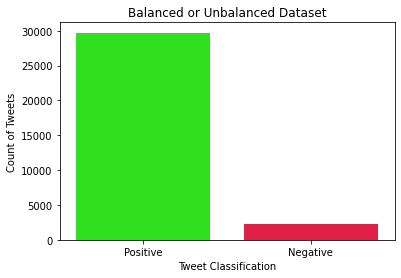

No of Tweets labelled as Non-Sexist: 29720
No of Tweets labelled as Sexist: 2242
Data is highly unbalanced with only 7.01 % negative points and  92.99 % positive points


In [12]:
positive = train['label'].value_counts()[0]
negative = train['label'].value_counts()[1]

flatui = ["#15ff00", "#ff0033"]
sns.set_palette(flatui)
sns.barplot(['Positive','Negative'],[positive,negative])
plt.xlabel('Tweet Classification')
plt.ylabel('Count of Tweets')
plt.title('Balanced or Unbalanced Dataset')
plt.show()

print('No of Tweets labelled as Non-Sexist:',positive)
print('No of Tweets labelled as Sexist:',negative)

print('Data is highly unbalanced with only',round(((negative/(negative+positive))*100),2),'% negative points and ',
      round(((positive/(negative+positive))*100),2),'% positive points')

Check the Distribution of Length of Tweets in train and Test Dataset

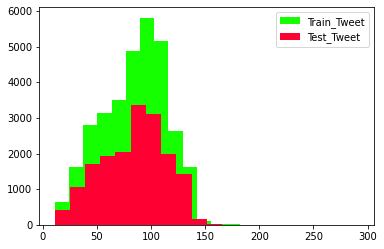

In [13]:
tweetLengthTrain = train['tweet'].str.len()
tweetLengthTest = test['tweet'].str.len()

plt.hist(tweetLengthTrain,bins=20,label='Train_Tweet')
plt.hist(tweetLengthTest,bins=20,label='Test_Tweet')
plt.legend()
plt.show()

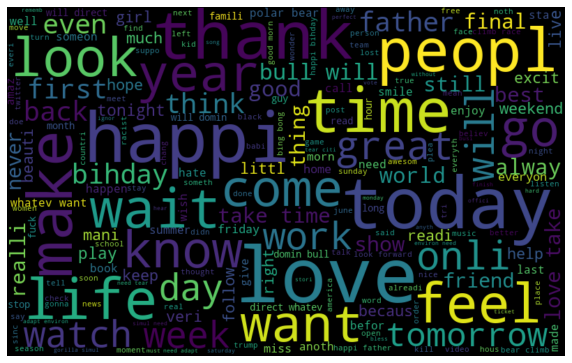

In [14]:
# Creating word Cloud for all Words in all tweets
allWords = ' '.join([text for text in all_data['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

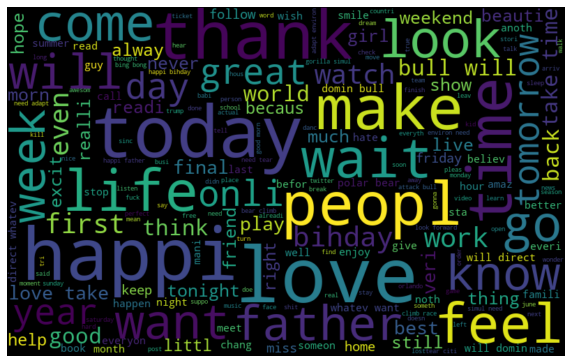

In [15]:
# Creating word Cloud for all Words in all positive tweets
positiveWords = ' '.join([text for text in all_data['tidy_tweet'][all_data['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positiveWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

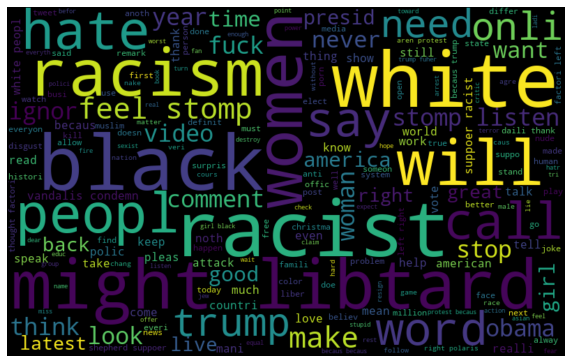

In [16]:
# Creating word Cloud for all Words in all negative tweets
positiveWords = ' '.join([text for text in all_data['tidy_tweet'][all_data['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positiveWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

References:
* https://www.kaggle.com/chiranjibsarma/twitter-sentiment-analysis-using-python
* https://medium.com/@scorrea92/nlp-twitter-sentiment-analysis-with-tensorflow-15e1b2594cfa

We have requested the API access to the twitter by creating developer account. And waiting their approval on it. Once we get the approval we would fetch the data directly from twitter.